In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Agrofood_co2_emission.csv')
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [5]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [6]:
df.dropna(inplace=True)

In [7]:
df.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

In [8]:
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
31,Albania,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,...,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750
32,Albania,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,...,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500
33,Albania,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,...,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250
34,Albania,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,...,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500
35,Albania,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,...,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0000,75.0,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0000,67.0,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0000,66.0,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0000,73.0,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [9]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]


In [10]:
#feature selection using anova
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X,y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = df[selected_features]
# Print the selected features
print(selected_features)

Index(['Year', 'Crop Residues', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport',
       'Food Household Consumption', 'Food Retail', 'Food Packaging',
       'Food Processing', 'Fertilizers Manufacturing', 'IPPU',
       'Fires in organic soils', 'Fires in humid tropical forests',
       'Urban population', 'total_emission'],
      dtype='object')


In [11]:
X = df[['Year', 'Crop Residues', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport',
       'Food Household Consumption', 'Food Retail', 'Food Packaging',
       'Food Processing', 'Fertilizers Manufacturing', 'IPPU',
       'Fires in organic soils', 'Fires in humid tropical forests',
       'Urban population', 'total_emission']]

In [12]:
#scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_ss=ss.fit_transform(X)

In [13]:
X_ss

array([[-1.72694782, -0.28085129, -0.26636349, ..., -0.25013199,
        -0.29486054, -0.30583899],
       [-1.614066  , -0.28767678, -0.26636349, ..., -0.25013199,
        -0.29477692, -0.29784915],
       [-1.50118418, -0.28805157, -0.26636349, ..., -0.25013199,
        -0.29471461, -0.29951247],
       ...,
       [ 1.43374313, -0.26838197, -0.27206691, ..., -0.25013199,
        -0.24182695,  0.03549453],
       [ 1.54662495, -0.28423784, -0.27206691, ..., -0.25013199,
        -0.24028025,  0.04027702],
       [ 1.65950677, -0.26879511, -0.27206691, ..., -0.25013199,
        -0.23867214,  0.03127978]])

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_ss,y,test_size=0.2,random_state=0)

In [15]:
mr=LinearRegression()
mr.fit(X_train,y_train)
y_pred=mr.predict(X_test)
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 0.3844181206850153
mean squared error: 0.25600677521758375
root mean squared error: 0.5059711209323945
r2-score: 0.32110683294818554


In [16]:
#random forest regrssor
rs=RandomForestRegressor()
rs.fit(X_train,y_train)
y_pred1=rs.predict(X_test)
y_pred1
print("mean absolute error:",mean_absolute_error(y_test,y_pred1))
print("mean squared error:",mean_squared_error(y_test,y_pred1))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 score:",r2_score(y_test,y_pred1)) 

mean absolute error: 0.29063715226390113
mean squared error: 0.15972350433931054
root mean squared error: 0.3996542309788682
R2 score: 0.5764362266531105


In [17]:
#gradient boosting regressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred3=gb.predict(X_test)
y_pred3
print("mean absolute error:",mean_absolute_error(y_test,y_pred3))
print("mean squared error:",mean_squared_error(y_test,y_pred3))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("R2 score:",r2_score(y_test,y_pred3))

mean absolute error: 0.31226942208566616
mean squared error: 0.17739602640133303
root mean squared error: 0.4211840766236694
R2 score: 0.5295712385594068


In [18]:
#adaboost regressor
ad=AdaBoostRegressor()
ad.fit(X_train,y_train)
y_pred4=gb.predict(X_test)
y_pred4
print("mean absolute error:",mean_absolute_error(y_test,y_pred4))
print("mean squared error:",mean_squared_error(y_test,y_pred4))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred4)))
print("R2 score:",r2_score(y_test,y_pred4))

mean absolute error: 0.31226942208566616
mean squared error: 0.17739602640133303
root mean squared error: 0.4211840766236694
R2 score: 0.5295712385594068


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Scatter plot')

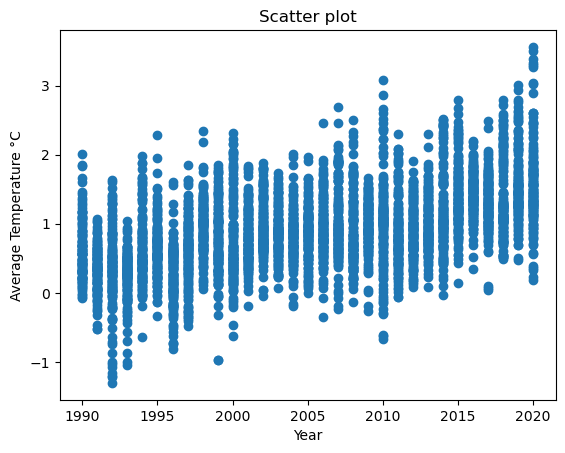

In [20]:
plt.scatter(df['Year'],df['Average Temperature °C'])
plt.xlabel('Year')
plt.ylabel('Average Temperature °C')
plt.title('Scatter plot')

<Axes: xlabel='Year', ylabel='Average Temperature °C'>

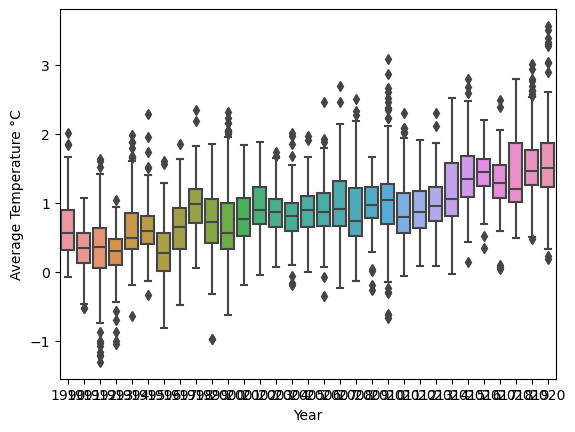

In [21]:
plt = sns.boxplot(x='Year',y='Average Temperature °C',data=df)
plt

In [22]:

plt.plot(df['Year'],df['Average Temperature °C'])

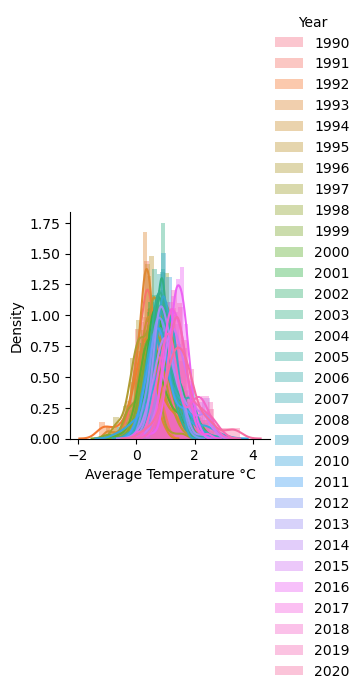

In [23]:
sns.FacetGrid(df,hue='Year').map(sns.distplot,'Average Temperature °C').add_legend()

In [ ]:
t